# Stochastic Gradient Descent (SGD)

### Nhắc lại thuật toán Gradient Descent

Để giải bài toán tìm điểm global optimal của hàm mất mát $J(θ)$ (Hàm mất mát cũng thường được ký hiệu là $J()$ với $θ$ là tập hợp các tham số của mô hình), chúng ta thực hiện các bước :

1. khởi tạo $θ=θ_0$. Thường là $(1,1,1...,1)$ hoặc $(0,0,...,0)$
2. Cập nhật θ đến khi đạt được kết quả chấp nhận được: $$θ=θ−η × ∇_θJ(θ)$$

với $∇_θJ(θ)$ là đạo hàm của hàm mất mát tại θ.

Đây chính là thuật toán GD cơ bản. Nếu bạn đọc còn phân vân GD là gì thì hãy nghiên cứu kỹ chương [Gradient Descent](GD.ipynb) để nắm rõ nhé.

Trong bài viết này, tôi sẽ giới thiệu thêm một biến thể khác của gradient descent được gọi là Stochastic Gradient Descent (SGD)

## Ý tưởng thuật toán

Trong thuật toán này, tại 1 thời điểm, ta chỉ tính đạo hàm của hàm mất mát dựa trên chỉ một điểm dữ liệu xi rồi cập nhật $θ$ dựa trên đạo hàm này. Việc này được thực hiện với từng điểm trên toàn bộ dữ liệu, sau đó lặp lại quá trình trên. Thuật toán rất đơn giản này trên thực tế lại làm việc rất hiệu quả.

Mỗi lần duyệt một lượt qua tất cả các điểm trên toàn bộ dữ liệu được gọi là một epoch. Với GD thông thường thì mỗi epoch ứng với 1 lần cập nhật $θ$, với SGD thì mỗi epoch ứng với N lần cập nhật θ với N là số điểm dữ liệu. 

Nhìn vào một mặt, việc cập nhật từng điểm một như thế này có thể làm giảm đi tốc độ thực hiện 1 epoch. Nhưng nhìn vào một mặt khác, SGD chỉ yêu cầu một lượng epoch rất nhỏ (thường là 10 cho lần đầu tiên, sau đó khi có dữ liệu mới thì chỉ cần chạy dưới một epoch là đã có nghiệm tốt). Vì vậy SGD phù hợp với các bài toán có lượng cơ sở dữ liệu lớn (chủ yếu là Deep Learning mà chúng ta sẽ thấy trong phần sau của blog) và các bài toán yêu cầu mô hình thay đổi liên tục, tức online learning.

**Thứ tự lựa chọn điểm dữ liệu**

Một điểm cần lưu ý đó là: sau mỗi epoch, chúng ta cần shuffle (xáo trộn) thứ tự của các dữ liệu để đảm bảo tính ngẫu nhiên. Việc này cũng ảnh hưởng tới hiệu năng của SGD.

Một cách toán học, quy tắc cập nhật của SGD là:$$θ=θ−η×∇_θJ(θ;xi;yi)$$

trong đó $∇_θJ(θ;xi;yi)$ là đạo hàm của hàm mất mát $J(θ;xi;yi)$ tại 1 cặp điểm dữ liệu $(x_i,y_i)$. 

Chú ý: chúng ta hoàn toàn có thể áp dụng các thuật toán tăng tốc GD như Momentum, AdaGrad,… vào SGD.

**Ví dụ với bài toán Linear Regression**

Với bài toán Linear Regression, $θ=w$, hàm mất mát tại một điểm dữ liệu là:

$$J(w;x_i;y_i)= \frac{1}{2}(x_i w − y_i)^2$$

Đạo hàm theo w tương ứng là:

$$∇_wJ(w;x_i;y_i)=x^T_i(x_iw−y_i)$$

Epoch 1: Loss = 5.5989, w = 1.5813, y = 1.4749
Epoch 2: Loss = 4.3558, w = 1.5031, y = 1.4527
Epoch 3: Loss = 3.3895, w = 1.4342, y = 1.4331
Epoch 4: Loss = 2.6383, w = 1.3734, y = 1.4157
Epoch 5: Loss = 2.0543, w = 1.3199, y = 1.4004
Epoch 6: Loss = 1.6003, w = 1.2727, y = 1.3868
Epoch 7: Loss = 1.2474, w = 1.2311, y = 1.3747
Epoch 8: Loss = 0.9730, w = 1.1944, y = 1.3640
Epoch 9: Loss = 0.7597, w = 1.1621, y = 1.3546
Epoch 10: Loss = 0.5939, w = 1.1336, y = 1.3462
Epoch 11: Loss = 0.4650, w = 1.1086, y = 1.3387
Epoch 12: Loss = 0.3647, w = 1.0865, y = 1.3320
Epoch 13: Loss = 0.2868, w = 1.0670, y = 1.3261
Epoch 14: Loss = 0.2262, w = 1.0498, y = 1.3209
Epoch 15: Loss = 0.1791, w = 1.0347, y = 1.3162
Epoch 16: Loss = 0.1425, w = 1.0214, y = 1.3120
Epoch 17: Loss = 0.1140, w = 1.0097, y = 1.3082
Epoch 18: Loss = 0.0918, w = 0.9994, y = 1.3048
Epoch 19: Loss = 0.0746, w = 0.9903, y = 1.3018
Epoch 20: Loss = 0.0612, w = 0.9823, y = 1.2991
Epoch 21: Loss = 0.0507, w = 0.9753, y = 1.2966
E

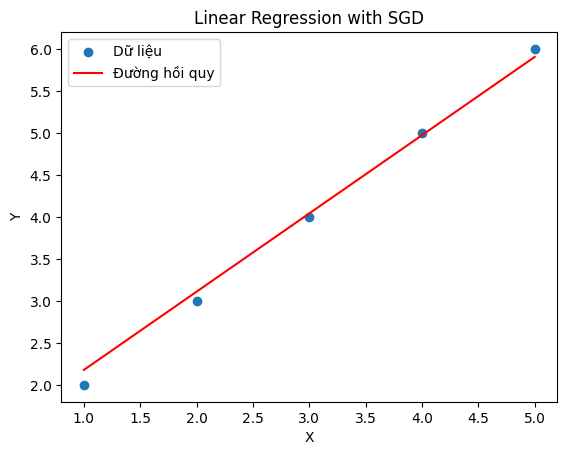

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm đích: y = wx + y
def f(x, w, y):
    return w * x + y

# Hàm mất mát: Mean Squared Error (MSE)
def loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Đạo hàm của hàm mất mát theo w và y
def gradient(x, y_true, w, y):
    y_pred = f(x, w, y)
    dw = np.mean((y_pred - y_true) * x)
    dy = np.mean(y_pred - y_true)
    return dw, dy

# Dữ liệu
x = np.array([1, 2, 3, 4, 5])
y_true = np.array([2, 3, 4, 5, 6])

# Tham số SGD
learning_rate = 0.01
epochs = 100
w = 1.67
y = 1.5

# Huấn luyện mô hình bằng SGD
for epoch in range(epochs):
    # Tính đạo hàm
    dw, dy = gradient(x, y_true, w, y)
    
    # Cập nhật trọng số
    w -= learning_rate * dw
    y -= learning_rate * dy
    
    # Tính toán và in ra loss
    y_pred = f(x, w, y)
    current_loss = loss(y_true, y_pred)
    print(f"Epoch {epoch+1}: Loss = {current_loss:.4f}, w = {w:.4f}, y = {y:.4f}")

# Vẽ đồ thị dữ liệu và đường hồi quy tương ứng
plt.scatter(x, y_true, label='Dữ liệu')
plt.plot(x, f(x, w, y), color='red', label='Đường hồi quy')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with SGD')
plt.legend()
plt.show()


In [4]:
import numpy as np
import random

a = [random.randint(10,50) for i in range(10)]
b = [random.randint(10,50) for i in range(10)]

print(a)
print(b)

[25, 26, 39, 22, 22, 35, 23, 21, 16, 24]
[26, 10, 32, 36, 33, 23, 22, 14, 41, 49]
